In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn = pd.read_csv(r"C:\Users\User\Desktop\data analysis\PYTHON\projects\Bank Customer Churn\Bank+Customer+Churn\Bank_Churn.csv")
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [88]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

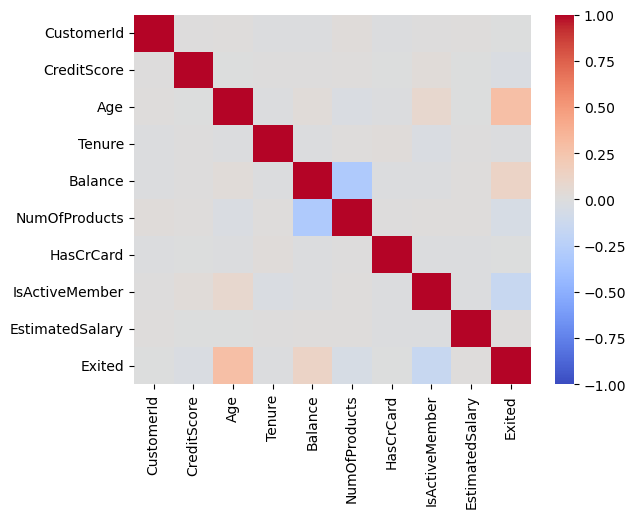

In [89]:
sns.heatmap(churn.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm") 
# Heatmap matrix to find relationships between all pairs of numeric columns 
# Number of products is negativrle correlated with balance

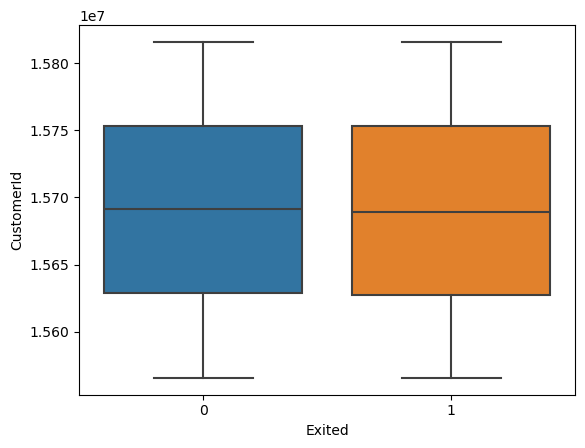

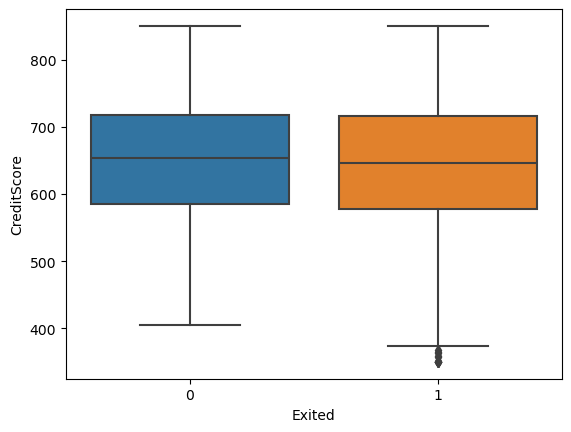

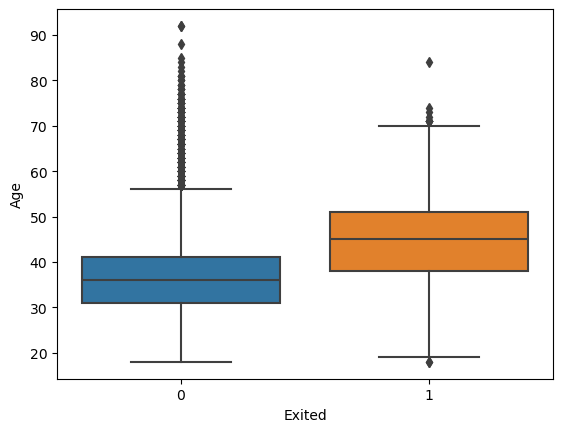

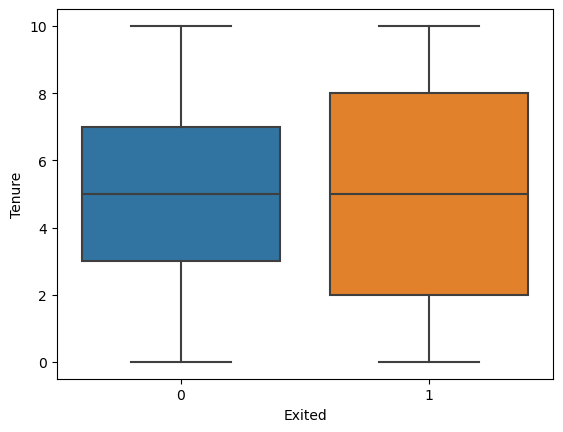

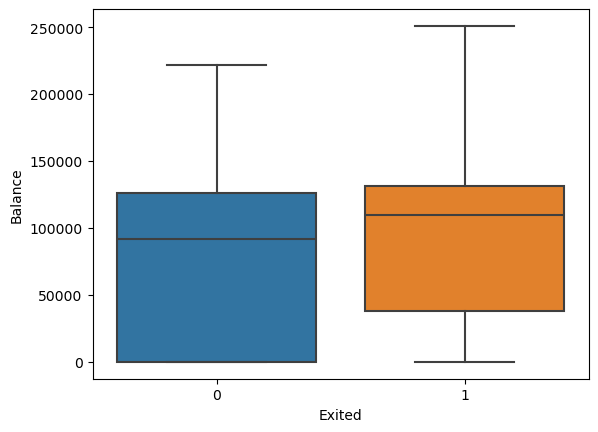

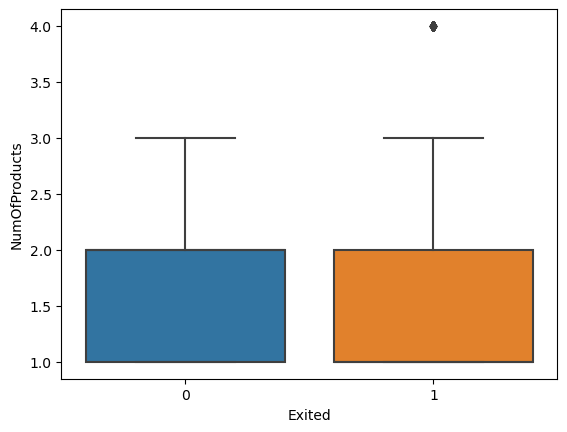

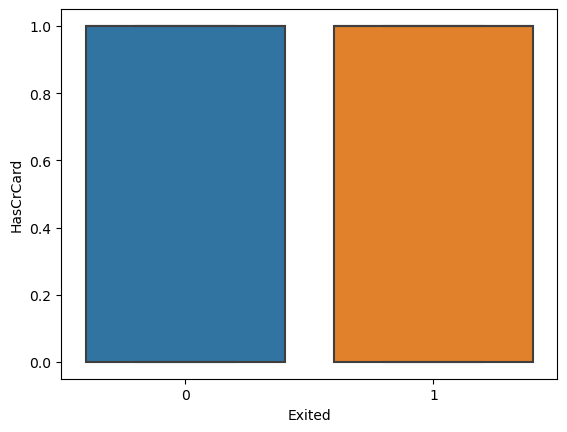

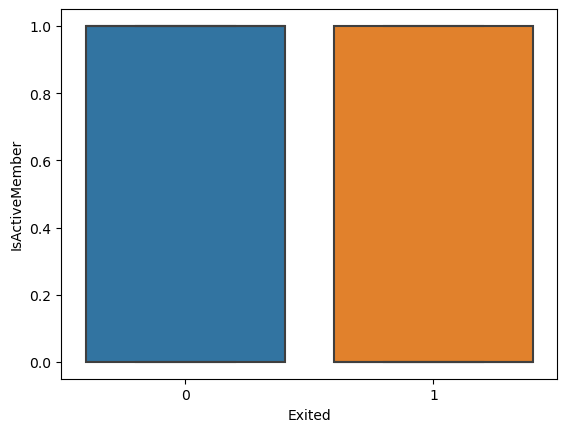

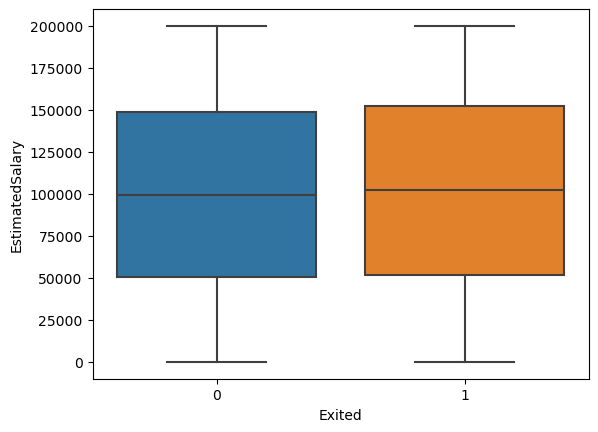

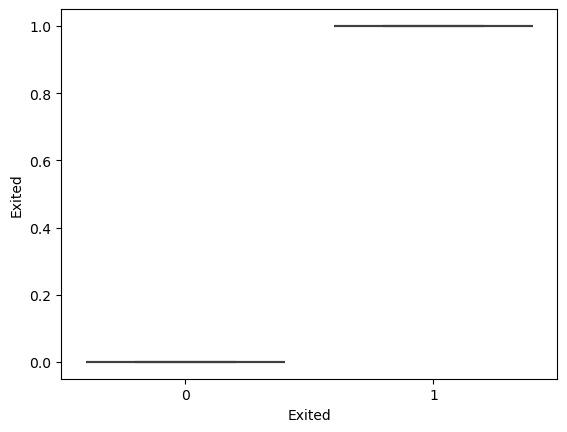

In [90]:
for col in churn.select_dtypes("number"):
    sns.boxplot(data=churn, x="Exited", y=col)
    plt.show()

# Median age between churners and non churners is 10 years
# Customers with a lot of tenure and a little tenyre are much likley to churn
# Customers with higher balance tend to churn

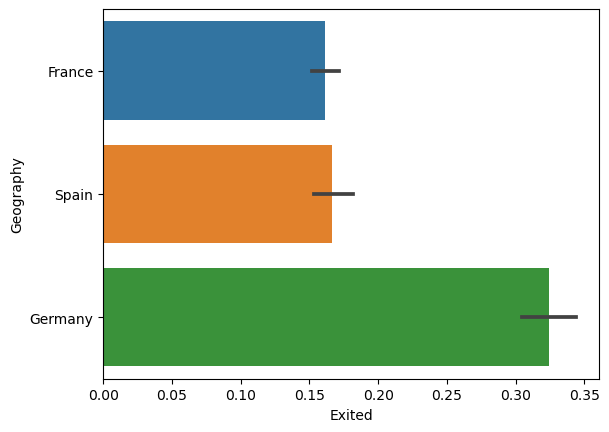

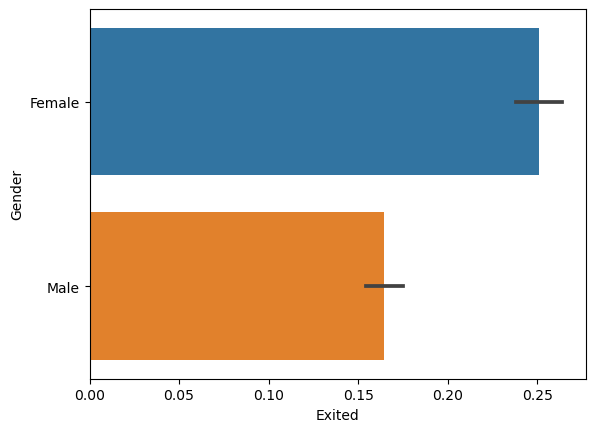

In [91]:
for col in churn.select_dtypes("object").columns[1:]:
    sns.barplot(data=churn, x="Exited", y=col)
    plt.show()

# Germany has the highest churn rate - 33%, compare to Spain and France - 16% and 15% accordingly.
# Females tend to churn 8% more than males

In [92]:
# Preparing the data for modeling

In [93]:
churn_modelling_df = churn.drop(["CustomerId", "Surname"], axis=1)

In [94]:
churn_modelling_df = churn_modelling_df.assign(
    balance_to_income = churn_modelling_df["Balance"] / churn_modelling_df["EstimatedSalary"],
    income_vs_products = churn_modelling_df["EstimatedSalary"] / churn_modelling_df["NumOfProducts"]
)
churn_modelling_df#.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_vs_products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260


<Axes: xlabel='Exited', ylabel='balance_to_income'>

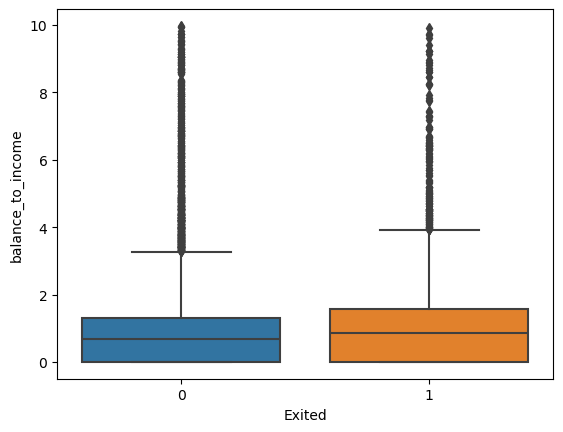

In [95]:
sns.boxplot(churn_modelling_df.query("balance_to_income < 10"), x="Exited", y="balance_to_income")
# churners have slightly higher balance to income rate

<Axes: xlabel='Exited', ylabel='income_vs_products'>

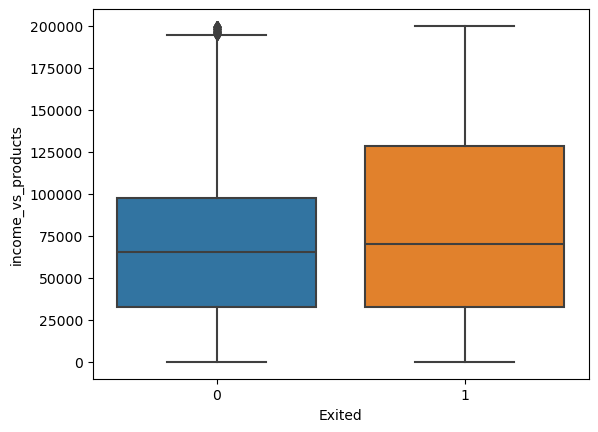

In [96]:
sns.boxplot(churn_modelling_df, x="Exited", y="income_vs_products")
# A gap of 5,000 between the medians

In [97]:
churn_modelling_df = pd.get_dummies(churn_modelling_df, drop_first=True, dtype="int")
churn_modelling_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_vs_products,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260,1,0,1


In [98]:
#Split the data into train and test sets, with 20% of the rows in the test set
from sklearn.model_selection import train_test_split
X = churn_modelling_df.drop("Exited", axis=1)
y = churn_modelling_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [99]:
#Fitting a logistic regression model on the training data

In [100]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="newton-cholesky")

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.817


In [101]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train, lr.predict(X_train))

array([[6119,  253],
       [1211,  417]], dtype=int64)

In [102]:
precision_score(y_train, lr.predict(X_train))

0.6223880597014926

In [103]:
recall_score(y_train, lr.predict(X_train))

0.25614250614250617

In [104]:
f1_score(y_train, lr.predict(X_train))

0.36292428198433424

In [105]:
list(zip(X_train,lr.coef_[0]))

[('CreditScore', -0.0009187111129064383),
 ('Age', 0.0734867067743719),
 ('Tenure', -0.015723073221588738),
 ('Balance', 2.159495227819864e-06),
 ('NumOfProducts', 0.7986881910560673),
 ('HasCrCard', -0.11739952340062884),
 ('IsActiveMember', -1.079683544361124),
 ('EstimatedSalary', -1.7153764609830576e-05),
 ('balance_to_income', 0.0005748891887945847),
 ('income_vs_products', 2.221317994433682e-05),
 ('Geography_Germany', 0.7955740153693514),
 ('Geography_Spain', 0.03551308451564055),
 ('Gender_Male', -0.4993144026831347)]

In [106]:
#X_train2 = X_train.drop(["Balance", "EstimatedSalary", "income_vs_products"], axis=1)
# those features have a very small influence  in predicting the target variable.

In [107]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1536,   55],
       [ 320,   89]], dtype=int64)

In [108]:
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Test Accuracy: 0.8125


In [109]:
precision_score(y_test,lr.predict(X_test))

0.6180555555555556

In [110]:
recall_score(y_test,lr.predict(X_test))

0.2176039119804401

In [111]:
f1_score(y_test, lr.predict(X_test))

0.3218806509945751

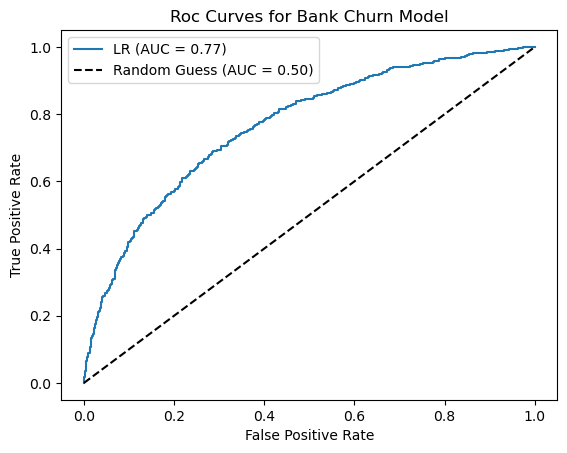

In [112]:
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(X_test) [:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

#plot the ROC curve
plt.plot(fpr1, tpr1, label=f'LR (AUC = {auc_score:.2f})')

#Draw random guess
plt.plot([0,1], [0,1], 'k--', label = 'Random Guess (AUC = 0.50)')

#Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curves for Bank Churn Model')
plt.legend()
plt.show()

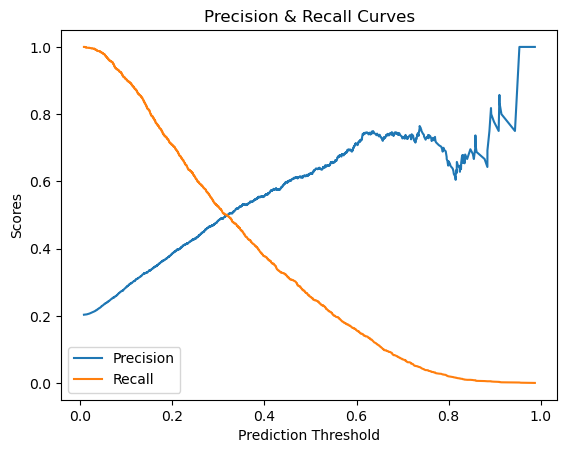

In [113]:
from sklearn.metrics import precision_recall_curve

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision & Recall Curves')
plt.legend()
plt.show()

In [114]:
import numpy as np
np.where(p_curve > .5)

(array([6377, 6383, 6384, ..., 7998, 7999, 8000], dtype=int64),)

In [115]:
t_curve[6377]

0.3197171449360369

In [116]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:,1] > .32 )

array([[1400,  191],
       [ 223,  186]], dtype=int64)

In [117]:
recall_score(y_test, lr.predict_proba(X_test)[:,1] > .32)

0.4547677261613692

In [118]:
precision_score(y_test, lr.predict_proba(X_test)[:,1] > .32)

0.493368700265252

In [119]:
# fit a random forest model, tune it using cross validation, and evaluate test accuracy, AUC score, and feature importance.

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")


Train Accuracy: 0.999875
Test Accuracy: 0.8515


In [121]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features':[None, "sqrt"],
    'bootstrap': [True],
    'max_samples':[None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2,5,10,20,100],
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 1000,
 'min_samples_leaf': 20,
 'max_samples': 0.9,
 'max_features': None,
 'max_depth': 7,
 'bootstrap': True}

In [122]:
from sklearn.model_selection import GridSearchCV


# Set n_jobs to use all cores or a manageable number
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)  # Try n_jobs=4 for fewer cores

# Define a smaller, safer parameter grid
params = {
    'n_estimators': np.arange(start=850, stop=951, step=50),  # Fewer combinations
    'max_samples': [0.4, 0.5],  # Reduced range
    'max_depth': [8, 10],  # Reduced depth options
    'min_samples_leaf': [5, 10]  # Fewer leaf options
}

# GridSearchCV with accuracy scoring
grid = GridSearchCV(
    rf,
    params,
    scoring="accuracy",
    n_jobs=-1  # Grid search itself can also use multiple cores
)

# Fit the model on the training data
grid.fit(X_train, y_train)

# Display the best parameters found
print(grid.best_params_)

{'max_depth': 10, 'max_samples': 0.4, 'min_samples_leaf': 5, 'n_estimators': 850}


In [127]:
rf = RandomForestClassifier(**{'n_estimators': 850,  # Fewer combinations
    'max_samples': 0.4,  # Reduced range
    'max_depth': 10,  # Reduced depth options
    'min_samples_leaf': 5, # Fewer leaf options
    'bootstrap' : True})

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")


Train Accuracy: 0.879875
Test Accuracy: 0.858


In [128]:
y_probs = lr.predict_proba(X_test) [:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

auc_score

0.766118708689926

<Axes: xlabel='importance', ylabel='feature'>

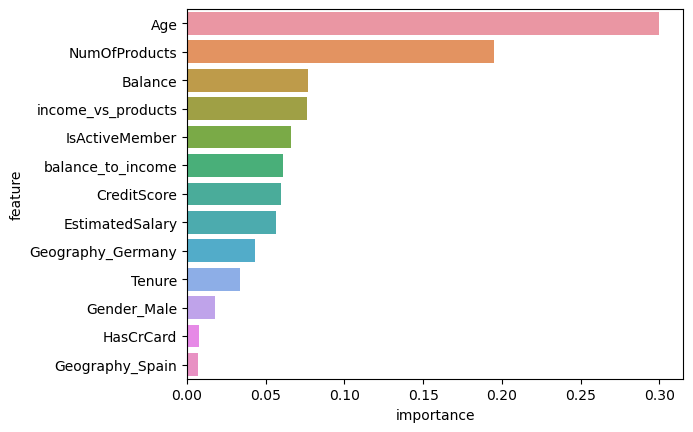

In [131]:
importance = pd.DataFrame(
    {"feature": X_train.columns,
    "importance": rf.feature_importances_}
).sort_values("importance", ascending=False).iloc[:20]

sns.barplot(importance, x="importance", y="feature")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_vs_products,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703,74715.158001,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260,52058.899406,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,32589.780000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002,65908.002500,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022,100943.797500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440,199970.740000,1.000000,1.000000,1.000000
